In [186]:
import transformers
import datasets
import numpy as np
import pandas as pd
import torch
import pathlib
from PIL import Image
import requests
import os
from matplotlib.pylab import plt

from transformers import CLIPTokenizerFast, CLIPProcessor, CLIPModel

In [187]:
image_dir = './fruits-360/fruits-360_dataset/fruits-360/Validation/'

device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "openai/clip-vit-base-patch32"

tokenizer = CLIPTokenizerFast.from_pretrained(model_id)
processor = CLIPProcessor.from_pretrained(model_id)
model = CLIPModel.from_pretrained(model_id).to(device)

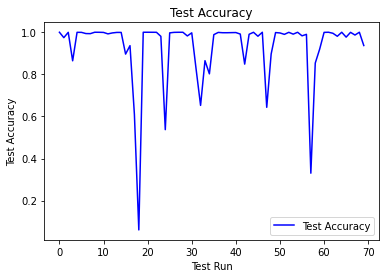

In [188]:
image_info = {}
image_names = []
categories = os.listdir(image_dir)
for idx, category in enumerate(categories):
    image_path = os.path.join(image_dir, category)
    images = os.listdir(image_path)
    file_path = os.path.join(image_path, images[0])
    image_info[category] = file_path
    image_names.append(category + ' image')

true_proba = []
false_proba = []

for image_name, image_path in image_info.items():
    image = Image.open(image_path)
    text_prompts = ['Image of a ' + image_name, ' Picture of a Jackfruit']
    inputs = processor(text=text_prompts, images=image, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image 
    probs = logits_per_image.softmax(dim=1) 
    true_proba.append(probs[0][0].item())
    false_proba.append(probs[0][1].item())

epochs = range(0,len(true_proba))
plt.plot(epochs, true_proba, 'b', label='Test Accuracy')
plt.title('Test Accuracy')
plt.xlabel('Test Run')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()
